In [167]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

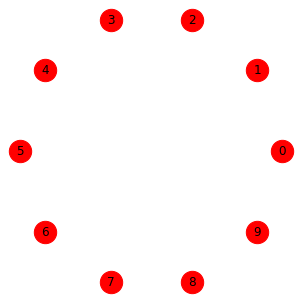

In [168]:
n = 10  # 定义节点的数量为10个
# 创建孤立节点图（没有任何边的图）
G1 = nx.Graph()  # 初始化一个无向图对象
G1.add_nodes_from(list(range(n)))  # 添加0到9共10个节点到图中
plt.figure(figsize=(4,4))  # 创建一个4x4英寸大小的图形
nx.draw(G1, 
    pos=nx.circular_layout(G1),  # 设置节点布局为圆形布局
    node_size=500,  # 设置节点大小为500
    node_color="red",  # 设置节点颜色为红色
    with_labels=True)  # 显示节点的标签（即节点的编号）
# plt.savefig("孤立图.pdf") # 保存可视化结果（此行已被注释，不会执行）

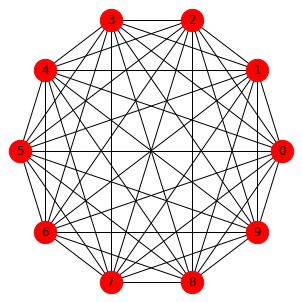

In [169]:
# 创建完全图（一个所有节点之间都有边连接的图）
G2 = nx.complete_graph(n)  # 使用之前定义的节点数量n(10)创建一个完全图，即每个节点都与其他所有节点相连

# 创建一个新的图形，大小为4x4英寸
plt.figure(figsize=(4,4))  

# 绘制图G2
nx.draw(G2, 
    pos=nx.circular_layout(G2),  # 使用圆形布局排列节点，所有节点均匀分布在一个圆上
    node_size=500,              # 设置节点的大小为500
    node_color="red",           # 设置节点的颜色为红色
    with_labels=True)           # 显示节点的标签（即节点的编号0-9）

# plt.savefig("完全图.pdf")  # 这行代码被注释掉了，如果取消注释，将会把图形保存为PDF文件

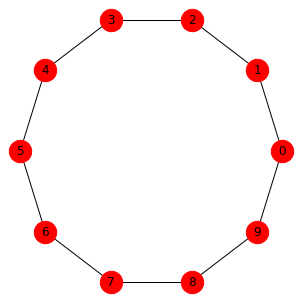

In [170]:
# 创建一维环状图
G3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G3, pos=nx.circular_layout(G3), node_size=500, node_color="red",with_labels=True)
# plt.savefig("一维环状图.pdf")

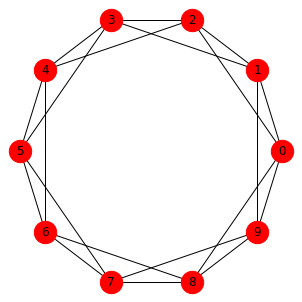

In [171]:
# K近邻规则（耦合）图
# 创建Watts-Strogatz小世界网络模型
# 参数含义: n表示节点数量, 4表示每个节点连接到的邻居数量, 0表示重连概率(为0时等同于规则网络)
G4 = nx.watts_strogatz_graph(n, 4, 0, seed=42)  # 创建Watts-Strogatz模型图
# n: 节点数量为10
# 4: 每个节点连接到4个最近邻居(即每边连接2个节点)
# 0: 重连概率为0，表示不进行随机重连，保持为规则网络
# seed=42: 设置随机种子以确保结果可重现
plt.figure(figsize=(4,4))
nx.draw(G4, pos=nx.circular_layout(G4), node_size=500, node_color="red",with_labels=True)
# plt.savefig("K近邻规则图.pdf")

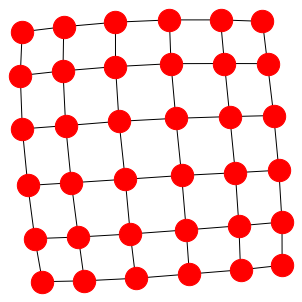

In [172]:
# 创建二维方格图
G5 = nx.grid_2d_graph(6, 6, periodic=False)  # 使用grid_2d_graph创建一个6x6的二维方格图，periodic=False表示不使用周期性边界条件

# 创建一个新的图形，大小为4x4英寸
plt.figure(figsize=(4,4))  

# 绘制图G5
nx.draw(G5, 
    pos=nx.spring_layout(G5),  # 使用spring布局更好地展示方格图
    node_size=500,           # 设置节点的大小为500
    node_color="red",        # 设置节点的颜色为红色
    with_labels=False)       # 不显示节点的标签，因为方格图节点较多，显示标签会使图形杂乱

# plt.savefig("二维方格图.pdf")  # 这行代码被注释掉了，如果取消注释，将会把图形保存为PDF文件

# 2、随机网络的两种生成算法

In [173]:
import random
import itertools

## 第一种：G(N,L)

In [174]:
def GNL(N, L):
    """
    生成具有N个节点和L条边的随机图 (Erdős–Rényi G(N,L)随机图模型)
    
    参数:
        N: 图中节点的数量
        L: 图中边的数量
    
    返回:
        G: 生成的随机图
    """
    # 创建一个空的无向图
    G = nx.Graph()
    
    # 添加N个节点到图中（节点标号为0到N-1）
    G.add_nodes_from(range(N))
    
    # 获取所有节点的列表，便于后续随机选择
    nlist = list(G)
    
    # 初始化已添加的边计数
    edge_count = 0
    
    # 循环直到添加了L条边
    while edge_count < L:
        # 随机选择两个节点u和v作为潜在的边的两端
        u = random.choice(nlist)
        v = random.choice(nlist)
        
        # 如果u和v是同一节点，或者u和v之间已经存在边，则跳过此次选择
        if u == v or G.has_edge(u, v):
            continue
        else:
            # 否则，添加一条连接u和v的边
            G.add_edge(u, v)
            # 已添加边的计数加1
            edge_count += 1
            
    return G

# 生成一个有100个节点和200条边的随机图
G = GNL(100, 200)

## 第二种：G(N,p)

In [175]:
def GNP(N, p):
    """
    生成具有N个节点和连接概率p的随机图 (Erdős–Rényi G(N,p)随机图模型)
    
    参数:
        N: 图中节点的数量
        p: 任意两个节点之间存在边的概率
    
    返回:
        G: 生成的随机图
    """
    # 生成所有可能的边（即所有可能的节点对组合）
    edges = itertools.combinations(range(N), 2)
    
    # 创建一个空的无向图
    G = nx.Graph()
    
    # 添加N个节点到图中（节点标号为0到N-1）
    G.add_nodes_from(range(N))
    
    # 遍历所有可能的边
    for e in edges:
        # 以概率p决定是否添加这条边
        if random.random() < p:
            # 如果随机生成的数小于p，则添加这条边
            G.add_edge(*e)
    
    return G

# 创建一个有100个节点，边的生成概率为0.6的随机图
G_random = GNP(100, 0.6)

Text(0.5, 1.0, 'G(N,p)')

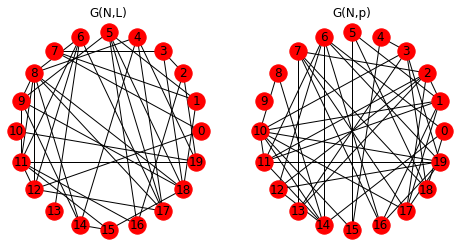

In [176]:
# 可以直接调用NetworkX库函数来生成ER随机图模型的两种变体
n, m, p = 20, 40, 0.2  # 设置参数：n为节点数(20个)，m为边数(40条)，p为连接概率(0.2)

# 生成G(N,L)模型：指定节点数n和边数m的随机图
g1 = nx.gnm_random_graph(n, m)  # 使用内置函数生成有20个节点和40条边的随机图

# 生成G(N,p)模型：指定节点数n和连接概率p的随机图
g2 = nx.gnp_random_graph(n, p)  # 使用内置函数生成有20个节点、每对节点间有0.2概率连边的随机图

# 创建一个宽8英寸，高4英寸的图形，用于同时展示两个子图
plt.figure(figsize=(8, 4))

# 设置左侧子图，用于展示G(N,L)模型
plt.subplot(121)  # 创建1行2列的子图布局，选择第1个位置
nx.draw(g1, 
    pos=nx.circular_layout(g1),  # 使用圆形布局排列节点
    node_size=300,              # 设置节点大小为300
    node_color="red",           # 设置节点颜色为红色
    with_labels=True)           # 显示节点标签
plt.title("G(N,L)")             # 为子图添加标题

# 设置右侧子图，用于展示G(N,p)模型
plt.subplot(122)  # 创建1行2列的子图布局，选择第2个位置
nx.draw(g2, 
    pos=nx.circular_layout(g2),  # 使用圆形布局排列节点
    node_size=300,              # 设置节点大小为300
    node_color="red",           # 设置节点颜色为红色
    with_labels=True)           # 显示节点标签
plt.title("G(N,p)")             # 为子图添加标题

In [177]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy import stats

# 3. ER随机网络的结构特性

In [178]:
# 定义求度分布的函数 - 计算图中各个度值对应的概率分布
def get_pdf(G, kmin, kmax):
    k = list(range(kmin, kmax+1))  # 创建从最小度值kmin到最大度值kmax的整数序列，包含两端点
    N = len(G.nodes())             # 获取图中节点的总数量
    
    Pk = []                        # 初始化一个空列表，用于存储每个度值对应的概率
    for ki in k:                   # 遍历每一个可能的度值ki
        c = 0                      # 初始化计数器，用于记录度为ki的节点数量
        for i in G.nodes():        # 遍历图G中的所有节点
            if G.degree(i) == ki:  # 检查当前节点i的度是否等于ki
                c += 1             # 如果节点i的度等于ki，计数器加1
                
        Pk.append(c/N)             # 计算度为ki的节点占总节点数的比例，即概率，并添加到Pk列表中
    
    return k, Pk                   # 返回度值列表k和对应的概率分布Pk

In [179]:
samples = 100  # 统计平均次数，用于多次生成随机图并计算平均结果，提高统计可靠性
N = [100,1000]  # 定义两种不同规模的网络节点数：100和1000

# 为了便于统计平均，指定研究的节点度范围为[20,80]
kmin, kmax, avk = 20, 80, 50  # kmin和kmax定义度分布的统计区间，avk是期望的平均度

# 初始化两个数组，用于累加不同网络规模的度分布结果
s1 = np.zeros(kmax-kmin+1)  # 用于存储N=100时不同度值的概率和
s2 = np.zeros(kmax-kmin+1)  # 用于存储N=1000时不同度值的概率和

for i in range(samples):  # 循环生成samples(100)次随机网络
    # 为N=100的网络，创建ER随机图，连接概率p=avk/N以保证平均度为50
    ER1 = nx.gnp_random_graph(N[0], avk/N[0])
    # 计算N=100的网络度分布
    x1, y1 = get_pdf(ER1, kmin, kmax)
    
    # 为N=1000的网络，创建ER随机图，连接概率同样设置为保证平均度为50
    ER2 = nx.gnp_random_graph(N[1], avk/N[1])
    # 计算N=1000的网络度分布
    x2, y2 = get_pdf(ER2, kmin, kmax)
    
    # 累加每次模拟的度分布结果
    s1 += np.array(y1)  # 累加N=100网络的度分布
    s2 += np.array(y2)  # 累加N=1000网络的度分布

# 计算二项分布理论值
n = 100  # 网络节点数为100
p = 0.5  # 连接概率为0.5
k = np.arange(20,81)  # 创建度值范围[20,80]的数组
pk_b = stats.binom.pmf(k,n,p)  # 使用scipy.stats计算二项分布概率质量函数值

# 计算泊松分布理论值
pk_p = [np.exp(-avk)*(avk**ki)/math.factorial(ki) for ki in range(kmin,kmax+1)]  # 使用泊松分布公式计算每个度值对应的概率

(20.0, 80.0)

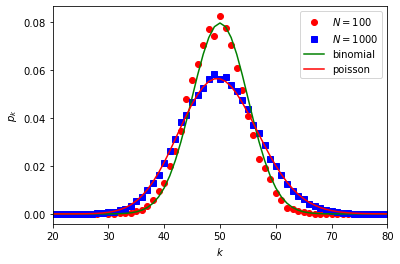

In [180]:
plt.figure(figsize=(6,4))
plt.plot(x1, s1/samples, 'ro', label='$N = 100$')
plt.plot(x2, s2/samples, 'bs', label='$N = 1000$')
plt.plot(x2, pk_b, 'g-', label='binomial')
plt.plot(x2, pk_p, 'r-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([20,80])

# 编程实践：测量/绘制真实网络的度分布

In [181]:
import pandas as pd
from decimal import Decimal   # python自带，不用自己安装

In [182]:
# 加载三个真实数据集
# 1. internet路由器网络 - 网络节点代表路由器，边表示路由器之间的连接
df1 = pd.read_csv("router_internet.csv")  # 从CSV文件加载internet路由器网络数据
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using=nx.Graph())  # 将数据转换为无向图对象

# 2. 科学合作网络 - 网络节点代表研究者，边表示合作关系
df2 = pd.read_csv("citation.csv")  # 从CSV文件加载科学引用/合作网络数据
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using=nx.Graph())  # 将数据转换为无向图对象

# 3. 蛋白质交互网络 - 网络节点代表蛋白质，边表示蛋白质之间的相互作用关系
df3 = pd.read_csv("protein_interaction.csv")  # 从CSV文件加载蛋白质相互作用网络数据
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph())  # 将数据转换为无向图对象

# 打印各个网络的节点数量，以了解三个真实网络的规模
print(f"Internet网络节点数: {len(G1.nodes())}, 边数: {len(G1.edges())}")
print(f"科学合作网络节点数: {len(G2.nodes())}, 边数: {len(G2.edges())}")
print(f"蛋白质交互网络节点数: {len(G3.nodes())}, 边数: {len(G3.edges())}")

Internet网络节点数: 192244, 边数: 609066
科学合作网络节点数: 23133, 边数: 93497
蛋白质交互网络节点数: 2018, 边数: 2930


In [183]:
# 计算G1网络中每个节点的度（degree）
# 度表示与节点相连的边的数量
deg1 = [G1.degree(i) for i in G1.nodes()]
kmin1, kmax1 = min(deg1), max(deg1)

# 计算G2网络中每个节点的度
deg2 = [G2.degree(i) for i in G2.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)

# 计算G3网络中每个节点的度
deg3 = [G3.degree(i) for i in G3.nodes()]
kmin3, kmax3 = min(deg3), max(deg3)

In [184]:
# 重新编写get_pdf函数，以更高效地计算度分布
def get_degree_distribution(G):
    """
    计算网络中所有节点的度分布
    
    参数:
        G: NetworkX图对象
        
    返回:
        k_values: 所有出现的度值（已排序）
        pk_values: 对应每个度值的概率
    """
    # 收集所有节点的度
    degrees = dict(G.degree())
    degree_counts = {}
    
    # 计算每个度值出现的频率
    for _, degree in degrees.items():
        if degree in degree_counts:
            degree_counts[degree] += 1
        else:
            degree_counts[degree] = 1
    
    # 计算概率分布
    total_nodes = len(G.nodes())
    k_values = sorted(degree_counts.keys())
    pk_values = [degree_counts[k]/total_nodes for k in k_values]
    
    return k_values, pk_values

# 计算三个真实网络的度分布
print("正在计算Internet路由器网络的度分布...")
k1, Pk1 = get_degree_distribution(G1)

print("正在计算科学合作网络的度分布...")
k2, Pk2 = get_degree_distribution(G2)

print("正在计算蛋白质交互网络的度分布...")
k3, Pk3 = get_degree_distribution(G3)

# 打印每个网络度分布的一些基本统计信息
print(f"Internet网络 - 最小度: {min(k1)}, 最大度: {max(k1)}, 平均度: {sum(k*p for k,p in zip(k1,Pk1)):.2f}")
print(f"科学合作网络 - 最小度: {min(k2)}, 最大度: {max(k2)}, 平均度: {sum(k*p for k,p in zip(k2,Pk2)):.2f}")
print(f"蛋白质交互网络 - 最小度: {min(k3)}, 最大度: {max(k3)}, 平均度: {sum(k*p for k,p in zip(k3,Pk3)):.2f}")

正在计算Internet路由器网络的度分布...
正在计算科学合作网络的度分布...
正在计算蛋白质交互网络的度分布...
Internet网络 - 最小度: 1, 最大度: 1071, 平均度: 6.34
科学合作网络 - 最小度: 1, 最大度: 281, 平均度: 8.08
蛋白质交互网络 - 最小度: 1, 最大度: 91, 平均度: 2.90


In [185]:
# 绘制度分布

# 计算各网络的平均度，方法是将所有节点的度加总后除以节点总数
avk1 = sum(deg1)/len(G1.nodes())  # Internet路由器网络的平均度
avk2 = sum(deg2)/len(G2.nodes())  # 科学合作网络的平均度
avk3 = sum(deg3)/len(G3.nodes())  # 蛋白质交互网络的平均度

# 注释部分说明：直接使用float可能会导致数值溢出错误，因为当ki很大时，avk^ki会变得非常大
# pk_p1 = [np.exp(-avk1)*(avk1**ki)/math.factorial(ki) for ki in range(kmin1, kmax1+1)]
# pk_p2 = [np.exp(-avk2)*(avk2**ki)/math.factorial(ki) for ki in range(kmin2, kmax2+1)]
# pk_p3 = [np.exp(-avk3)*(avk3**ki)/math.factorial(ki) for ki in range(kmin3, kmax3+1)]

# 使用Decimal库计算泊松分布值，以处理大数，避免数值溢出
# 泊松分布公式: P(X=k) = (e^-λ * λ^k) / k!，其中λ是平均度

# Internet路由器网络的泊松分布理论值
pk_p1 = [Decimal(np.exp(-avk1))*(Decimal(avk1)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin1, kmax1+1)]

# 科学合作网络的泊松分布理论值
pk_p2 = [Decimal(np.exp(-avk2))*(Decimal(avk2)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin2, kmax2+1)]

# 蛋白质交互网络的泊松分布理论值
pk_p3 = [Decimal(np.exp(-avk3))*(Decimal(avk3)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin3, kmax3+1)]

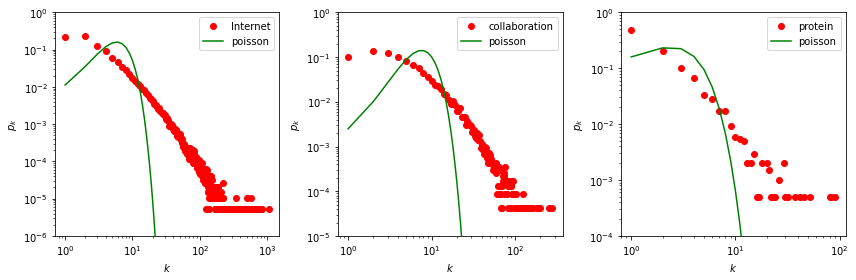

In [186]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(k1, Pk1, 'ro', label='Internet')
plt.plot(list(range(kmin1, kmax1+1)), pk_p1, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(132)
plt.plot(k2, Pk2, 'ro', label='collaboration')
plt.plot(list(range(kmin2, kmax2+1)), pk_p2, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-5,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(133)
plt.plot(k3, Pk3, 'ro', label='protein')
plt.plot(list(range(kmin3, kmax3+1)), pk_p3, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

plt.tight_layout()

# 编程实践：计算ER随机网络的平均最短路径长度和平均集聚系数
### networkx计算大型网络的平均最短路径长度比较耗时，为此，我们考虑使用igraph

In [187]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [188]:
def cal_by_igraph(samples, N):
    # 初始化四个空列表，用于存储不同网络规模下的计算结果
    avl, clu = [], []          # 用于存储模拟计算的平均路径长度和平均集聚系数
    t_avl, t_clu = [], []      # 用于存储理论计算的平均路径长度和平均集聚系数
    
    for n in N:                # 遍历每个网络规模n
        m = 5*n                # 设置边数为节点数的5倍，保证平均度约为10
        avl0 = 0               # 初始化当前规模网络的平均路径长度累加器
        clu0 = 0               # 初始化当前规模网络的平均集聚系数累加器
        t_avl0 = 0             # 初始化当前规模网络的理论平均路径长度累加器
        t_clu0 = 0             # 初始化当前规模网络的理论平均集聚系数累加器
        
        for i in range(samples):  # 对每个网络规模，重复生成samples次随机网络进行统计
            # 生成一个ER随机图，n是节点数，m是边数
            Ger = ig.Graph.Erdos_Renyi(n=n, m=m)
            
            # 计算图的平均度（所有节点度之和除以节点数）
            avk = sum(Ger.degree()) / n
            
            # 计算理论平均路径长度的近似值：ln(n)/ln(<k>)
            # 其中n是网络规模，<k>是平均度
            t_avl0 += np.log(n) / np.log(avk)
            
            # 计算理论集聚系数的近似值：<k>/n
            # 在ER随机图中，理论集聚系数等于任意两个节点相连的概率
            t_clu0 += avk / n

            # 计算实际的平均路径长度
            # igraph的average_path_length函数计算网络中所有点对之间的最短路径的平均值
            avl0 += Ger.average_path_length()
            
            # 计算实际的平均集聚系数
            # transitivity_avglocal_undirected计算每个节点的局部集聚系数，然后取平均值
            # mode='zero'表示对于度小于2的节点，其集聚系数定义为0
            clu0 += Ger.transitivity_avglocal_undirected(mode='zero')

        # 计算samples次生成的网络的平均值，并添加到结果列表中
        avl.append(avl0 / samples)    # 添加当前规模网络的平均路径长度
        clu.append(clu0 / samples)    # 添加当前规模网络的平均集聚系数  
        t_avl.append(t_avl0 / samples)  # 添加当前规模网络的理论平均路径长度
        t_clu.append(t_clu0/samples)    # 添加当前规模网络的理论平均集聚系数
        
    # 返回四个列表，分别是模拟的平均路径长度、模拟的平均集聚系数、理论的平均路径长度和理论的平均集聚系数
    return avl, clu, t_avl, t_clu


In [189]:
# 耐心等待，计算这些指标比较耗时
samples = 10  # 设置样本数量为10，即每个网络规模重复生成10次随机网络进行统计
              # 为了使结果更加精确，通常需要将samples设置为较大的值
              # 这里为了快速得到结果，使用了相对较小的样本数

N = [100,200,300,500,700,1000,2000,5000]  # 定义不同的网络规模列表
                                          # 从100个节点到5000个节点不等
                                          # 用于分析网络特性如何随规模变化

# avl_0, clu_0, t_avl0, t_clu0 = cal_by_networkx(samples, N) # 速度较慢
# 上面注释掉的代码是使用NetworkX库进行计算，但由于NetworkX在处理大型网络时效率较低，所以被注释掉了

avl_0, clu_0, t_avl0, t_clu0 = cal_by_igraph(samples, N)  # 使用igraph库计算各项网络指标
                                                          # 返回四个列表，分别是:
                                                          # avl_0: 模拟计算的平均最短路径长度
                                                          # clu_0: 模拟计算的平均集聚系数
                                                          # t_avl0: 理论计算的平均最短路径长度
                                                          # t_clu0: 理论计算的平均集聚系数

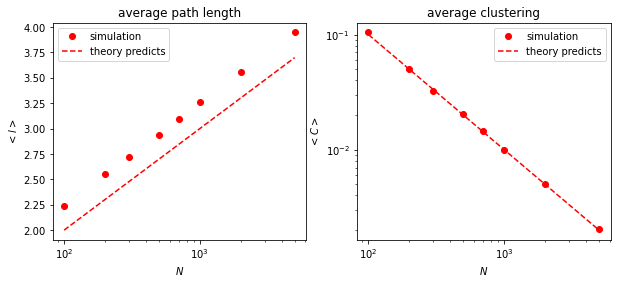

In [190]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(N, avl_0, 'ro', label='simulation')
plt.plot(N, t_avl0, 'r--', label='theory predicts')
plt.title("average path length")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<l>$")
plt.xscale("log")

plt.subplot(122)
plt.plot(N, clu_0, 'ro', label='simulation')
plt.plot(N, t_clu0, 'r--', label='theory predicts')
plt.title("average clustering")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<C>$")
plt.xscale("log")
plt.yscale("log")

## 编程实践：可视化ER随机网络的巨连通分量

ValueError: Program neato not found in path.

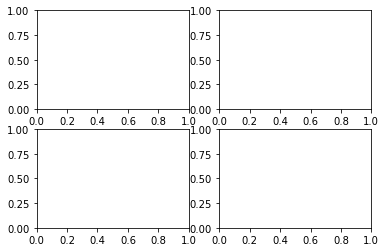

In [191]:
# 这段代码用来可视化ER随机网络中随着连接概率p的增加，巨连通分量(giant component)的形成过程

n = 500  # 设置网络节点总数为500个
# 计算形成巨连通分量的理论阈值概率: p_giant = 1/(n-1) ≈ 0.002
p_giant = 1.0 / (n - 1)
# 计算网络完全连通的理论阈值概率: p_conn = ln(n)/n ≈ 0.012
p_conn = math.log(n) / n

# 定义一组连接概率值，这些值围绕理论阈值设置
pvals = [0.001, 0.002, 0.005, 0.012]  # 从小于p_giant到等于p_conn

# 创建一个2×2的子图布局
fig, axes = plt.subplots(2, 2)
for p, ax, seed in zip(pvals, axes.ravel(), range(len(pvals))):
    #### 生成随机图 ####
    G = nx.binomial_graph(n, p, seed=seed)  # 生成ER随机图，n个节点，连接概率为p
    
    # 区分已连接和未连接的节点
    connected = [n for n, d in G.degree() if d > 0]  # 找出度大于0的节点(已连接节点)
    disconnected = list(set(G.nodes()) - set(connected))  # 找出孤立节点(度为0)
    
    # 找出最大连通分量(巨连通分量)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)  # 获取所有连通分量并按大小排序
    G0 = G.subgraph(Gcc[0])  # 提取最大连通分量形成的子图
    
    #### 绘制图形 ####
    pos = nx.nx_agraph.graphviz_layout(G)  # 使用Graphviz布局算法计算节点位置
    ax.set_title(f"p = {p:.3f}")  # 设置子图标题为当前的p值
    
    # 绘制最大连通分量的边(红色，较粗)
    options = {"ax": ax, "edge_color": "tab:red"}
    nx.draw_networkx_edges(G0, pos, width=6.0, **options)
    
    # 绘制其他连通分量的边(半透明，较粗)
    for Gi in Gcc[1:]:  # 遍历除最大连通分量外的所有连通分量
        if len(Gi) > 1:  # 只绘制至少有两个节点的连通分量
            nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
    
    # 绘制已连接节点和未连接节点
    options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
    nx.draw(G, pos, nodelist=connected, **options)  # 绘制已连接节点
    nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)  # 绘制未连接节点(半透明)

fig.tight_layout()  # 调整子图布局以避免重叠
plt.show()  # 显示图形

# 编程实践：计算ER随机网络的巨连通分量的相对大小

In [ ]:
def get_largest_connected_component_networkx(n, avki, samples):
    """
    使用NetworkX库计算多个随机图中巨连通分量的平均相对大小
    
    参数:
        n: 图中节点的数量
        avki: 期望的平均度
        samples: 要生成的随机图数量
        
    返回:
        巨连通分量的平均相对大小（占总节点数的比例）
    """
    s0 = 0  # 初始化累加器，用于存储所有样本的巨连通分量相对大小之和
    
    for i in range(samples):  # 循环生成samples个随机图样本
        m = int(n*avki/2)  # 计算边的数量：节点数*平均度/2（因为每条边连接两个节点）
        G = nx.gnm_random_graph(n, m)  # 生成一个有n个节点和m条边的随机图
        
        # 获取所有连通分量并按大小排序（从大到小）
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        
        # 计算最大连通分量（即巨连通分量）的相对大小并累加
        s0 += len(Gcc[0])/n
    
    # 返回所有样本的巨连通分量平均相对大小
    return s0/samples


def get_largest_connected_component_igraph(n, avki, samples):
    """
    使用igraph库计算多个随机图中巨连通分量的平均相对大小
    
    参数:
        n: 图中节点的数量
        avki: 期望的平均度
        samples: 要生成的随机图数量
        
    返回:
        巨连通分量的平均相对大小（占总节点数的比例）
    """
    s0 = 0  # 初始化累加器，用于存储所有样本的巨连通分量相对大小之和
    
    for i in range(samples):  # 循环生成samples个随机图样本
        m = int(n*avki/2)  # 计算边的数量：节点数*平均度/2（因为每条边连接两个节点）
        Ger = ig.Graph.Erdos_Renyi(n=n, m=m)  # 使用igraph生成ER随机图模型
        
        # 获取图的强连通分量（在无向图中，强连通和弱连通是等价的）
        components = Ger.connected_components(mode='strong')
        
        # 计算最大连通分量（即巨连通分量）的相对大小并累加
        # components[0]是最大的连通分量
        s0 += len(components[0])/n
    
    # 返回所有样本的巨连通分量平均相对大小
    return s0/samples

In [ ]:
# 定义计算参数
n, samples = 1000, 10  # n是网络节点数(1000)，samples是每个概率点的模拟次数(10)
avk = np.linspace(0, 5, 51)  # 创建51个均匀分布的点，范围从0到5，表示平均度

# 初始化结果列表，用于存储不同平均度下巨连通分量的相对大小
S = []

# 遍历每个平均度值
for avki in avk:
    # 使用NetworkX库计算当前平均度下巨连通分量的平均相对大小
    # n: 网络节点数为1000
    # avki: 当前迭代的平均度值
    # samples: 每个平均度值下模拟10个随机网络以获取平均结果
    sp = get_largest_connected_component_networkx(n, avki, samples)
    # 将计算结果添加到结果列表中
    S.append(sp)

In [ ]:

plt.figure(figsize=(6,4))
plt.plot(avk, S, 'ro-')
plt.xlabel(r"$\langle k \rangle$")
plt.ylabel("$S$")
# plt.savefig("S_vs_avk.png", dpi=600)

# 编程实践：计算ER随机网络的其他连通分量的平均大小

In [ ]:
def get_mean_size_connected_component_networkx(n, avki, samples):
    """
    计算ER随机网络中除最大连通分量外，其他连通分量的平均大小
    
    参数:
        n: 网络节点数量
        avki: 期望平均度
        samples: 模拟次数（生成的随机网络数量）
    
    返回:
        除最大连通分量外其他连通分量的平均大小（多次模拟的平均值）
    """
    s0 = 0  # 初始化累加器，用于存储所有样本的平均值之和
    
    for i in range(samples):  # 循环生成samples个随机图样本
        m = int(n*avki/2)  # 计算边的数量：节点数*平均度/2（因为每条边连接两个节点）
        G = nx.gnm_random_graph(n, m)  # 生成一个有n个节点和m条边的ER随机图
        
        # 获取所有连通分量并按大小从大到小排序
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        
        if len(Gcc) > 1:  # 确保有多于一个连通分量
            # 计算除最大连通分量外其他连通分量的大小平均值
            # Gcc[1:]表示排除最大的连通分量(Gcc[0])后的所有其他连通分量
            mean_size = np.mean([len(gcci) for gcci in Gcc[1:]])
        else:
            # 如果只有一个连通分量，则平均大小设为0
            mean_size = 0
        
        # 累加当前样本的平均大小
        s0 += mean_size
    
    # 返回所有样本的平均值
    return s0/samples

In [ ]:
# 定义计算节点数和样本次数
n, samples = 1000, 10  # n是网络节点数(1000个)，samples是模拟次数(每个概率点模拟10次)
avk = np.linspace(0, 5, 51)  # 创建51个均匀分布的点，范围从0到5，表示平均度的变化范围

# 初始化结果列表，用于存储不同平均度下其他连通分量的平均大小
S = []

# 遍历每个平均度值计算结果
for avki in avk:
    # 计算当前平均度下除最大连通分量外其他连通分量的平均大小
    # n: 网络节点数为1000
    # avki: 当前迭代的平均度值
    # samples: 每个平均度值下模拟10次随机网络以获取平均结果
    sp = get_mean_size_connected_component_networkx(n, avki, samples)
    # 将计算结果添加到结果列表中
    S.append(sp)

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(avk, S, 'ro-')
plt.xlabel(r"$\langle k \rangle$")
plt.ylabel(r"$\langle S \rangle$")

# 全球航线网络与具有相同节点和连边数的ER随机网络的度分布

In [ ]:
df = pd.DataFrame([
        ('World air transportation', '', 'openflights_world.edges.gz'),
    ],
    columns=['Name', 'Type', 'File'],
)

In [ ]:
updates = []
for idx, row in df.iterrows():
    fname = row['File']
    print(idx)
    # 根据文件名判断加载方式
    if 'graphml' in fname:
        # 如果是graphml格式文件，使用read_graphml加载
        G = nx.read_graphml(fname)
    else:
        # 否则按照边列表(edgelist)格式加载
        # 根据Type字段决定是有向图还是无向图
        graph_class = nx.DiGraph() if 'D' in row['Type'] else nx.Graph()
        # 如果Type包含'W'，则加载带权重的图，否则不带权重
        data_spec = [('weight', float)] if 'W' in row['Type'] else False
        # 读取边列表文件创建图
        G = nx.read_edgelist(fname, create_using=graph_class, data=data_spec)
# 打印加载的图的节点数和边数
print(nx.number_of_nodes(G), nx.number_of_edges(G))

# 创建一个随机图，节点数和边数与航线网络相同
# 使用gnm_random_graph生成固定节点数和边数的ER随机图
n_nodes = nx.number_of_nodes(G)
n_edges = nx.number_of_edges(G)
G2 = nx.gnm_random_graph(n_nodes, n_edges)

# 计算两个网络的度范围
deg = [G.degree(i) for i in G.nodes()]
kmin, kmax = min(deg), max(deg)

deg2 = [G2.degree(i) for i in G2.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)


In [ ]:
# 定义求度分布的函数：舍弃概率为零的那些值
def get_pdf2(G, kmin, kmax):
    k = list(range(kmin, kmax+1))  # 获取所有可能的度值
    N = len(G.nodes())
    
    new_k = []
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1 
        if c > 0:
            new_k.append(ki)
            Pk.append(c/N)    
    Pck = [sum(Pk[i:]) for i in range(len(Pk))] # 累积度分布
    
    return new_k, Pk, Pck
# 计算两个网络的度分布和累积度分布
k, Pk, Pck = get_pdf2(G, kmin, kmax)
k2, Pk2, Pck2 = get_pdf2(G2, kmin2, kmax2)

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(k, Pk, 'ro-', label='World air transportation')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")


plt.subplot(132)
plt.plot(k2, Pk2, 'bs-', label='ER')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")


plt.subplot(133)
plt.plot(k, Pck, 'ro-', label='World air transportation')
plt.plot(k2, Pck2, 'bs-', label='ER')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")